# Use k-Means to cluster IRIS dataset

In [1]:
from sklearn.datasets import load_iris
import numpy as np

## Load Data

In [2]:
d = load_iris()

In [3]:
d.data.shape

(150, 4)

In [4]:
d.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Sample Data

In [5]:
idx = list(range(5))+list(range(50,55))+list(range(100,105))
d_data = d.data[idx,2:] # only select 15 samples and two features 
d_target = d.target[idx]
d_target # choose 5 from each class 

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

## Cluster Algorithm

In [6]:
def MSEloss(x, m):
    """
    x and m can be a scalar or a matrix
    """
    return np.sum((x-m)**2)

def kMeans(data, k=3, max_iter=100, tol=1e-20, diff_type='max'):
    """
    k: number of group
    max_iter: max allowed number of iteration
    tol: under this tolerance, regard the differences are the same
    diff_type:  'max': max_diff or 'mean': mean_diff is restricted within tol
    """
    loss = MSEloss
    N, dim = data.shape
    idx = np.random.choice(N,k,replace=False) 
    print ('k-Means: k={}, max_iter: {}, tol:{}, starting_points={}'   \
           .format(k, max_iter, tol, idx ))
    m = data[idx].copy()
    m_new = m.copy() #initial value
    it = 0 #initial
    C = None #initial
    boo = True
    while ( boo ):
        m = m_new.copy() 
        C = [set({}) for i in range(k)] # empty set for each class
        for j in range(N): # each sample
            x_j = data[j] 
            d_ji = [loss(x_j,m[i]) for i in range(k)] # distant to each class
            lambda_j = np.argmin(d_ji) # assign to which class
            C[lambda_j].add(j) # assign j to the class
        diff = []
        for i in range(k):
            _m_new = np.mean([data[j] for j in C[i]],axis=0)# new m for class i
            _diff = np.abs(_m_new - m[i])
            _diff_ = np.max(_diff) if diff_type=='max' else mean_diff
            diff.append(_diff_)
            if ( _diff_ > tol):
                m_new[i] = _m_new
            else:
                m_new[i] = m[i]
        
        print ('Epoch: {},  C={}'.format(it, C))
        it+=1
        boo = it < max_iter and (m_new != m).any()
    return C
                 
C = kMeans(d_data, k=3)    

k-Means: k=3, max_iter: 100, tol:1e-20, starting_points=[5 4 6]
Epoch: 0,  C=[{5, 7, 10, 11, 12, 13, 14}, {0, 1, 2, 3, 4}, {8, 9, 6}]
Epoch: 1,  C=[{10, 11, 12, 13, 14}, {0, 1, 2, 3, 4}, {8, 9, 5, 6, 7}]
Epoch: 2,  C=[{10, 11, 12, 13, 14}, {0, 1, 2, 3, 4}, {8, 9, 5, 6, 7}]


## Plot

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
c_ = ['r', 'g', 'b']
l_ = ['group_{}'.format(i+1) for i in range(3)]

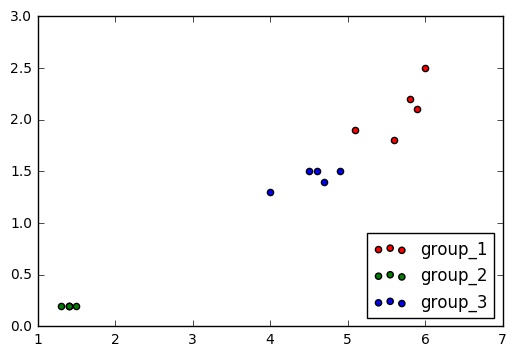

In [9]:
for i,g in enumerate(C):
    plt.scatter(*zip(*d_data[list(g)]), c=c_[i],label=l_[i])
    plt.legend(loc='lower right')